<a href="https://colab.research.google.com/github/aiswarya-1422/ictak/blob/main/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent.
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

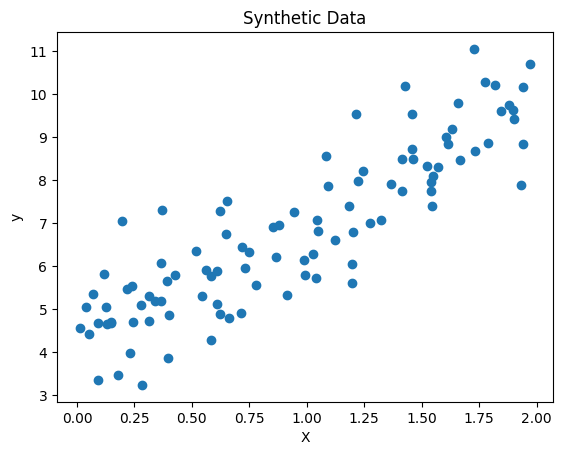

In [84]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()


## Do Train-Test Split (75%-25%)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Do the Linear Regression with Scikit-Learn Library

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error
mod1 = LinearRegression()
mod1.fit(X_train, y_train)
y_pred = mod1.predict(X_test)
a=r2_score(y_test, y_pred)
b=mean_absolute_percentage_error(y_test, y_pred)
print(a)
print(b)

0.7502160290465685
0.11510854759055766


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [87]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_percentage_error
mod1 = Ridge()
mod1.fit(X_train, y_train)
y_pred = mod1.predict(X_test)
a=r2_score(y_test, y_pred)
b=mean_absolute_percentage_error(y_test, y_pred)
print(a)
print(b)

0.7507043675163194
0.11336096308936673


In [88]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_percentage_error
mod1 = Lasso()
mod1.fit(X_train, y_train)
y_pred = mod1.predict(X_test)
a=r2_score(y_test, y_pred)
b=mean_absolute_percentage_error(y_test, y_pred)
print(a)
print(b)

-0.029886683980633766
0.27100310602072253


In [89]:
import pandas as pd
result_df = pd.DataFrame(columns = ['model', 'metric', 'value'])
result_df.loc[len(result_df)] = ["Linear Regression", "MSE", a]
result_df.loc[len(result_df)] = ["Linear Regression", "R2-score", b]
result_df.loc[len(result_df)] = ["Ridge Regression", "MSE", a]
result_df.loc[len(result_df)] = ["Ridge Regression", "R2-score", b]
result_df.loc[len(result_df)] = ["Lasso Regression", "MSE", a]
result_df.loc[len(result_df)] = ["Lasso Regression", "R2-score", b]
result_df

,model,metric,value
0,Linear Regression,MSE,-0.029887
1,Linear Regression,R2-score,0.271003
2,Ridge Regression,MSE,-0.029887
3,Ridge Regression,R2-score,0.271003
4,Lasso Regression,MSE,-0.029887
5,Lasso Regression,R2-score,0.271003


## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:

## 🧠 Custom Linear Regression Class

In [90]:
class MyLinearRegression:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y, n_iters=1000):

        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        if len(y.shape) == 1:
            y = y.reshape(-1, 1)


        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            loss = np.mean((y_pred - y) ** 2)
            self.losses.append(loss)


            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        return np.dot(X, self.weights) + self.bias

    def plot_loss(self):
        plt.plot(self.losses)
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title("Loss Curve")
        plt.show()

## 🔁 Train the Model and Visualize the Fit

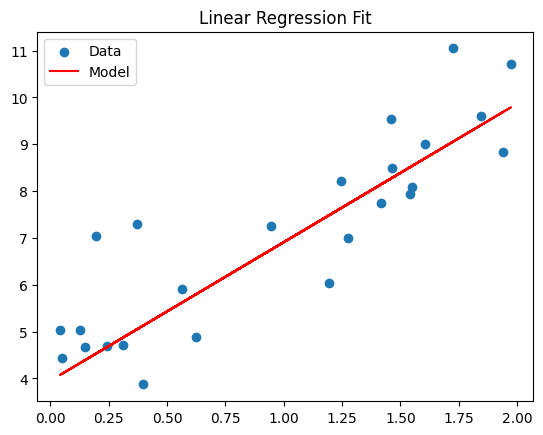

Learned coefficients (m, c): [[2.95682046]] 3.9525935823930523


In [91]:
model = MyLinearRegression(learning_rate=0.1)
model.fit(X_train, y_train, n_iters=100)


y_pred = model.predict(X_test)


plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()


print("Learned coefficients (m, c):", model.weights, model.bias)

## 📉 Plot the Loss Curve

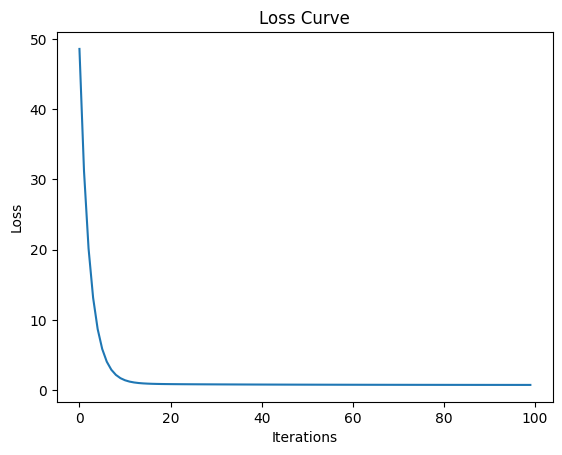

In [92]:
model.plot_loss()

## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [93]:
import numpy as np
import matplotlib.pyplot as plt

class MyLinearRegressionSGD:
    def __init__(self, learning_rate=0.01):
        self.lr = learning_rate
        self.weight = 0
        self.bias = 0
        self.losses = []

    def fit(self, X, y, epochs=50):
        X = np.array(X)
        y = np.array(y)
        n = len(X)

        for epoch in range(epochs):
            total_loss = 0

            for i in range(n):
                xi = X[i]
                yi = y[i]


                y_pred = self.weight * xi + self.bias


                error = y_pred - yi

                self.weight -= self.lr * error * xi
                self.bias -= self.lr * error


                total_loss += error**2

            avg_loss = total_loss / n
            self.losses.append(avg_loss)

    def predict(self, X):
        return self.weight * np.array(X) + self.bias

    def plot_loss(self):
        plt.plot(self.losses)
        plt.xlabel("Epoch")
        plt.ylabel("Loss (MSE)")
        plt.title("Loss Curve - SGD")
        plt.grid(True)
        plt.show()


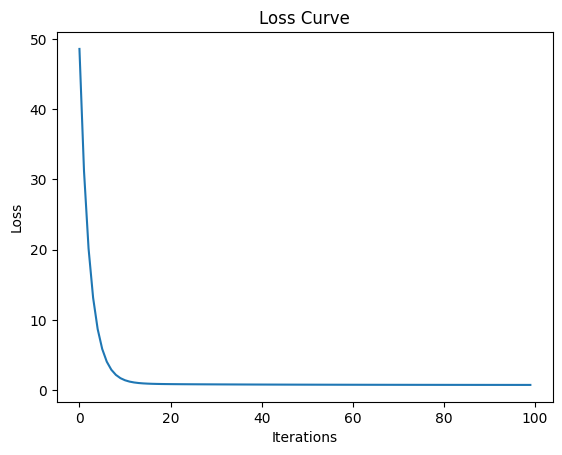

In [94]:
model.plot_loss()

## Visualize the prediction result of Library version and Custom regression code created

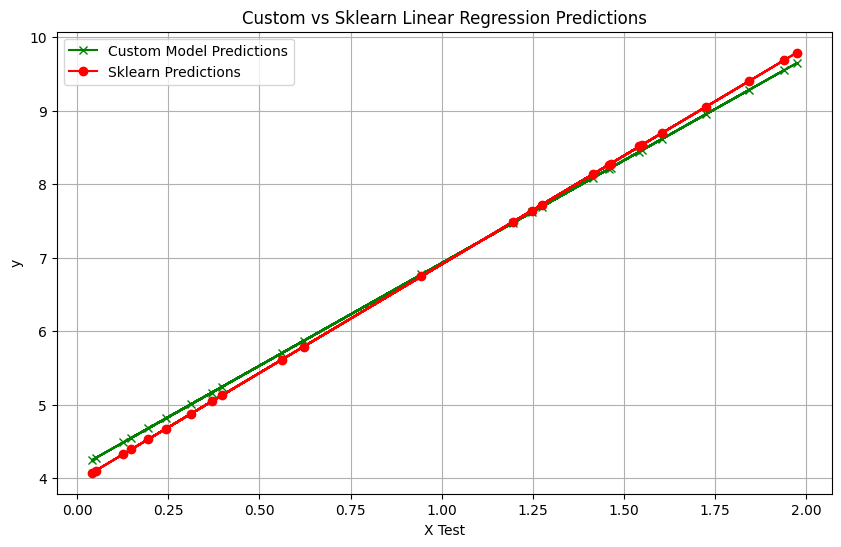

In [98]:
mod1=LinearRegression()
mod2 = MyLinearRegression()
mod1.fit(X_train, y_train)
mod2.fit(X_train, y_train)
y_pred1 = mod1.predict(X_test)
y_pred2 = mod2.predict(X_test)



plt.figure(figsize=(10, 6))
plt.plot(X_test, y_pred1, color='green', marker='x', label='Custom Model Predictions')
plt.plot(X_test, y_pred2, color='red', marker='o', label='Sklearn Predictions')
plt.title("Custom vs Sklearn Linear Regression Predictions")
plt.xlabel("X Test")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## ✅ Checklist
- [ ] Did linear regression using scikit-learn API
- [ ] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [ ] Derived gradients using chain rule
- [ ] Implemented custom Linear Regression class
- [ ] Trained using gradient descent
- [ ] Visualized predictions and loss
- [ ] Implemented stochastic gradient descent (bonus)
- [ ] Visualized predictions and loss for stochastic gradient descent (bonus)
- [ ] Visualize the prediction result of Library version and custom version